Ingestion et Feature Engineering
## Étape 1 : Familiarisation avec les données

Repérez les variables cibles qui sont "SiteEnergyeUse(kBtu)" et "TotalGHGEmissions(MetricTonsCO2e)".
Repérez les variables pertinentes pour prédire les variables cibles.

## Étape 2 : S'assurer de la qualité des données

Vérifiez la qualité des données, en recherchant des valeurs manquantes ou aberrantes.
Nettoyez les données en supprimant ou en imputant les valeurs manquantes.

## Étape 3 : Feature Engineering

Faites de l'extraction de caractéristiques à partir des données brutes, par exemple :
Calculer l'ancienneté du bâtiment par rapport à l'année de relevé de données à partir de l'année de construction.
Faire du one-hot encoding avec pd.get_dummies pour les données catégorielles comme "BuildingType".
Bien normaliser les données continues pour les modèles linéaires et choisir la bonne transformation si nécessaire.
Évitez de prendre des caractéristiques corrélées entre elles pour les modèles linéaires.

## Étape 4 : Filtrer les bâtiments non destinés à l'habitation

Appliquez un filtre pour ne conserver que les bâtiments non destinés à l'habitation.

## Étape 5 : Transformation des données catégorielles en dummies (one-hot encoding)

Utilisez pd.get_dummies ou OneHotEncoder de sklearn.preprocessing pour transformer les données catégorielles en variables binaires.

## Étape 6 : Création de pipelines de prétraitement

Créez des pipelines de prétraitement pour vous assurer que toutes les données subissent la même transformation avant d'entraîner les modèles.
Modélisation

## Étape 7 : Modèle d'apprentissage supervisé

Mettez en place le modèle d'apprentissage supervisé adapté au problème métier.
Choisissez la meilleure variable cible en justifiant le choix de la transformation si nécessaire.

## Étape 8 : Essai de plusieurs algorithmes

Testez plusieurs algorithmes de régression de manière cohérente, en partant des plus simples vers les plus complexes.
Pour chaque modèle, travaillez de manière itérative en commençant par un nombre restreint de variables et en ajoutant progressivement.

## Étape 9 : Évaluation des performances

Choisissez une métrique adaptée pour comparer les modèles linéaires et non linéaires (RMSE, écart moyen, R2, etc.).
Testez plusieurs indicateurs de performance pour comprendre les résultats.
Développez une stratégie pour détecter l'overfitting.

## Étape 10 : Cross-validation

Utilisez la validation croisée (par exemple, GridSearchCV) pour trouver les paramètres qui renvoient le meilleur score R² pour chaque modèle.
Entraînez les modèles sur l'ensemble d'entraînement et évaluez-les sur l'ensemble de test.

## Étape 11 : Feature Importance

Analysez les importances des caractéristiques (feature importance) pour chaque modèle.

## Étape 12 : Comparaison des modèles

Comparez les performances de tous les modèles utilisés avec leurs meilleurs hyperparamètres.
Utilisez une démarche claire pour choisir les modèles finaux.

## Étape 13 : Création de pipelines de prétraitement

Vous pouvez mettre tout le prétraitement des données, y compris le one-hot encoding, dans les pipelines pour plus de propreté.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Data

In [2]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [3]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
data.shape

(3376, 46)

In [5]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [6]:
data = data[~data.isin([np.inf, -np.inf]).any(axis=1)]

In [7]:
print (data.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

### SiteEnergyUse(kBtu) : 
Cette colonne semble contenir la consommation totale en énergie des bâtiments, car elle est étiquetée "SiteEnergyUse" et est mesurée en kBtu (kilobritish thermal units).
Le British thermal unit est une unité d'énergie utilisée dans certains pays anglophones. Elle est définie par la quantité de chaleur nécessaire pour élever la température d'une livre anglaise d'eau d'un degré °F à la pression constante d'une atmosphère.
### TotalGHGEmissions : 
Cette colonne semble contenir les émissions totales de gaz à effet de serre (CO2), car elle est étiquetée "TotalGHGEmissions".

In [9]:
data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


- La colonne OSEBuildingID semble être un identifiant unique pour chaque bâtiment.
- Les données sont pour l'année 2016, comme prévu.
- Certaines colonnes comme ZipCode, CouncilDistrictCode ont des valeurs manquantes (count est inférieur au nombre total d'entrées).
- Il y a une variabilité dans les années de construction (YearBuilt).
- La colonne NumberofFloors a des valeurs extrêmes élevées (maximum de 99), ce qui peut nécessiter un examen plus approfondi.
- La colonne PropertyGFATotal représente la superficie totale en pieds carrés et a une gamme de valeurs considérable.

## Repartition des types de batiments 

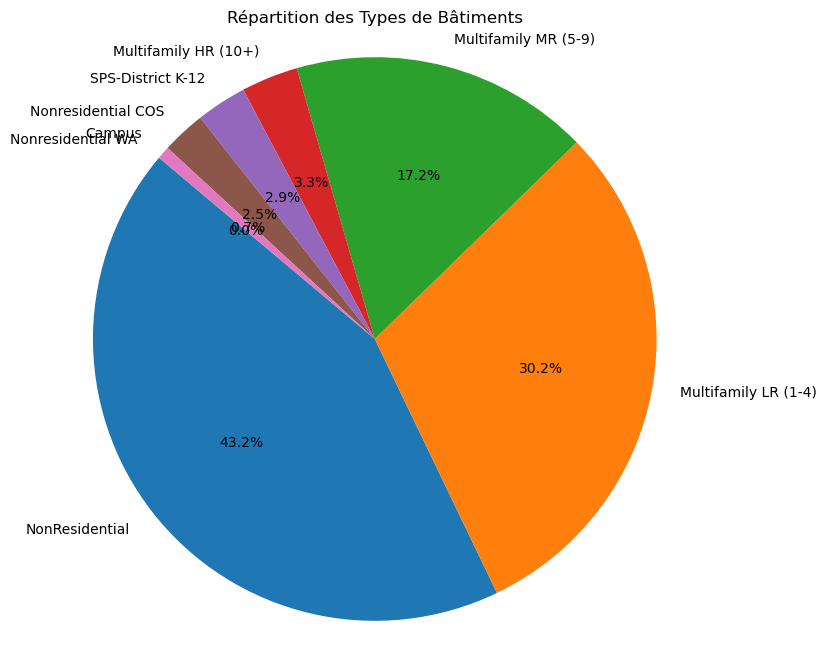

In [10]:
# Compter les occurrences de chaque type de bâtiment
building_type_counts = data['BuildingType'].value_counts()

# Créer un pie chart
plt.figure(figsize=(8, 8))
plt.pie(building_type_counts, labels=building_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des Types de Bâtiments")
plt.axis('equal')  # Laisser le graphique circulaire
plt.show()

Les données non residentielles occupent 43,2 % du jeu de données.

In [11]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

## Filtrage pour ne conserver que les batiments non résidentiels

In [12]:
# Créer une liste des valeurs de 'BuildingType' que vous souhaitez conserver
non_residential_types = ['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus', 'Nonresidential WA']

# Utiliser l'opérateur isin pour filtrer les données
data = data[data['BuildingType'].isin(non_residential_types)]

# Vérifier la forme des données filtrées
print("Shape of filtered data:", data.shape)

Shape of filtered data: (1668, 46)


In [13]:
# Sélectionner les colonnes pertinentes
selected_columns = ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']
subset_data = data[selected_columns]

# Calculer la matrice de corrélation
correlation_matrix = subset_data.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)

                     PropertyGFATotal  SiteEnergyUse(kBtu)  TotalGHGEmissions
PropertyGFATotal             1.000000             0.804162           0.524564
SiteEnergyUse(kBtu)          0.804162             1.000000           0.859940
TotalGHGEmissions            0.524564             0.859940           1.000000


La corrélation entre 'PropertyGFATotal' et 'SiteEnergyUse(kBtu)' est de 0.796781. Cela suggère une corrélation positive forte entre ces deux variables. En d'autres termes, à mesure que la taille totale de la propriété ('PropertyGFATotal') augmente, la consommation d'énergie ('SiteEnergyUse(kBtu)') a tendance à augmenter.
La corrélation entre 'PropertyGFATotal' et 'TotalGHGEmissions' est de 0.531436. Cela indique également une corrélation positive, mais un peu moins forte. En d'autres termes, à mesure que la taille totale de la propriété augmente, les émissions totales de gaz à effet de serre ('TotalGHGEmissions') ont tendance à augmenter, mais la relation est moins forte que celle avec la consommation d'énergie.
La corrélation entre 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions' est de 0.862668. Cela suggère une corrélation positive très forte entre ces deux variables. En d'autres termes, à mesure que la consommation d'énergie augmente, les émissions totales de gaz à effet de serre ont tendance à augmenter de manière significative.
Ces résultats de corrélation sont cohérents avec ce que l'on pourrait attendre : une augmentation de la taille totale de la propriété et de la consommation d'énergie est généralement associée à des émissions de gaz à effet de serre plus élevées.

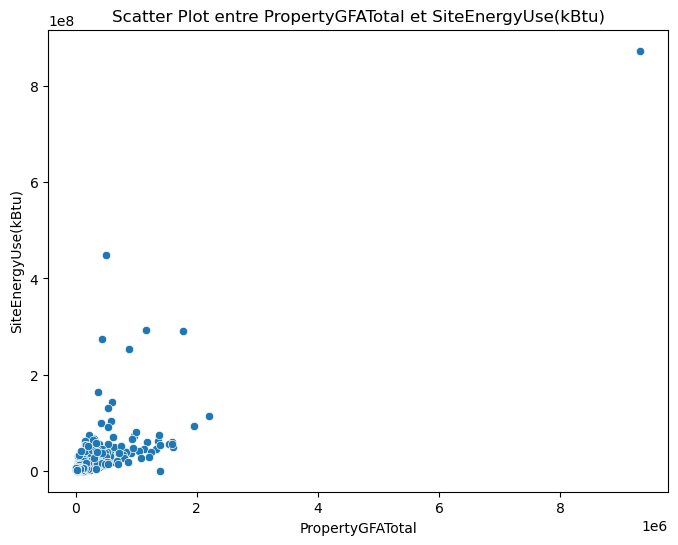

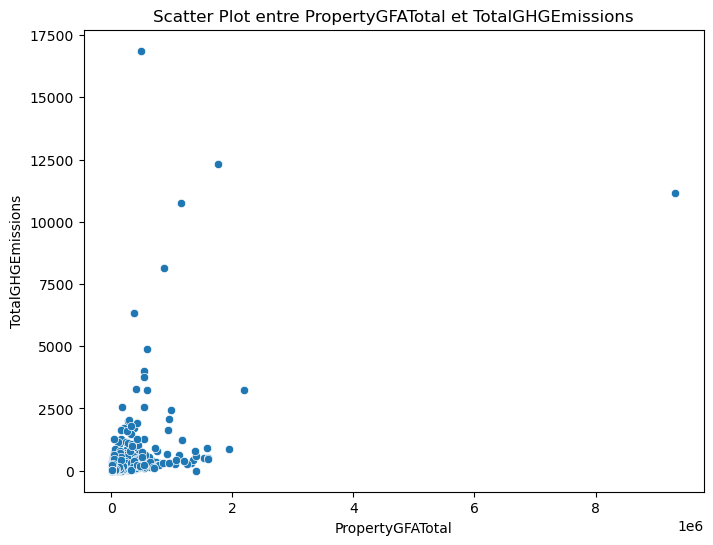

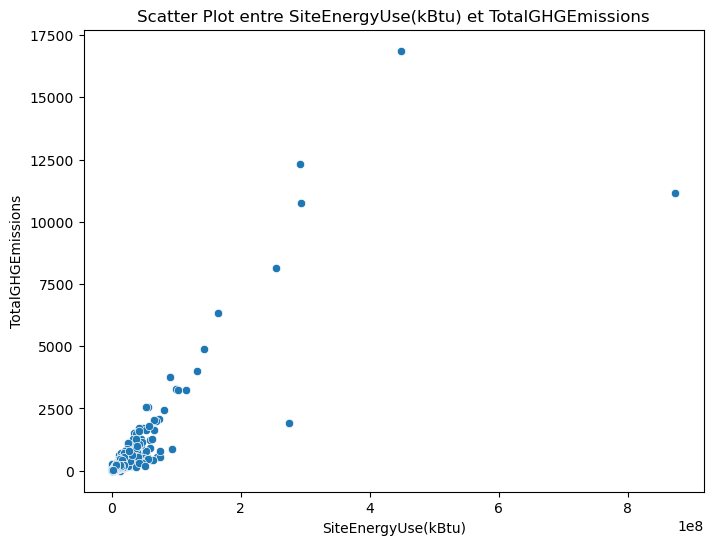

In [14]:
# Scatter plot entre 'PropertyGFATotal' et 'SiteEnergyUse(kBtu)'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', data=subset_data)
plt.title('Scatter Plot entre PropertyGFATotal et SiteEnergyUse(kBtu)')
plt.xlabel('PropertyGFATotal')
plt.ylabel('SiteEnergyUse(kBtu)')
plt.show()

# Scatter plot entre 'PropertyGFATotal' et 'TotalGHGEmissions'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PropertyGFATotal', y='TotalGHGEmissions', data=subset_data)
plt.title('Scatter Plot entre PropertyGFATotal et TotalGHGEmissions')
plt.xlabel('PropertyGFATotal')
plt.ylabel('TotalGHGEmissions')
plt.show()

# Scatter plot entre 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SiteEnergyUse(kBtu)', y='TotalGHGEmissions', data=subset_data)
plt.title('Scatter Plot entre SiteEnergyUse(kBtu) et TotalGHGEmissions')
plt.xlabel('SiteEnergyUse(kBtu)')
plt.ylabel('TotalGHGEmissions')
plt.show()

# Distribution par années de construction des batiments 

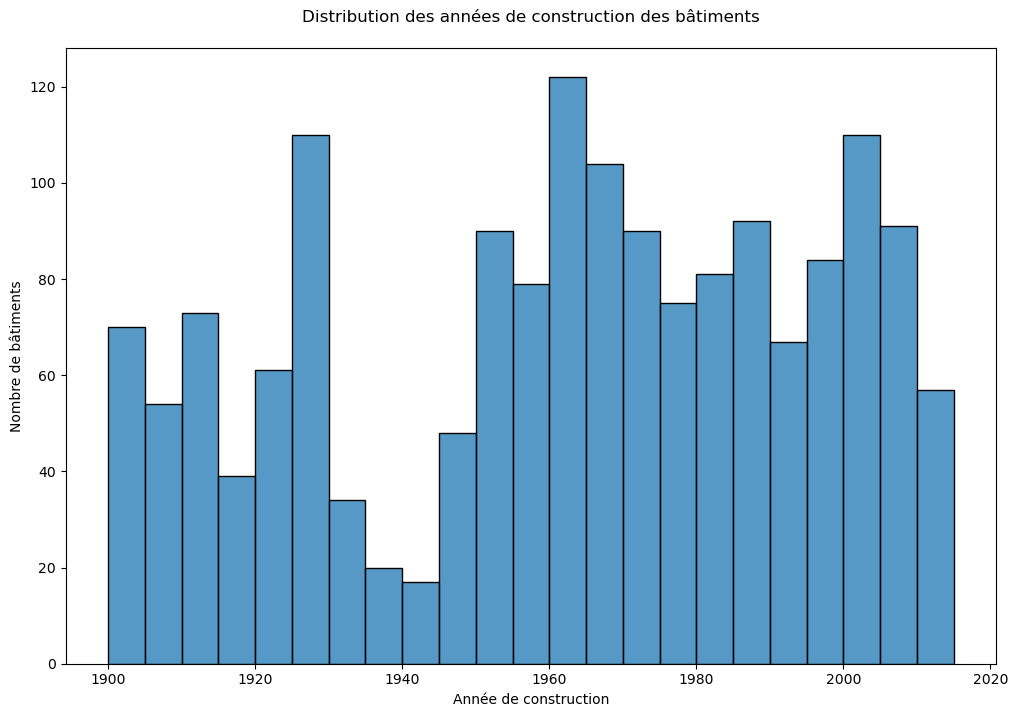

In [15]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='YearBuilt', bins=int((data.YearBuilt.max() - data.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n")
plt.show()

On constate que le plus grand pic de constructions est vers les années 1960, il y'a également une chute autour des années 1940 surement liés aux guerres.

# Création d'une colonne BuildingAge et visualisation de le repartition 

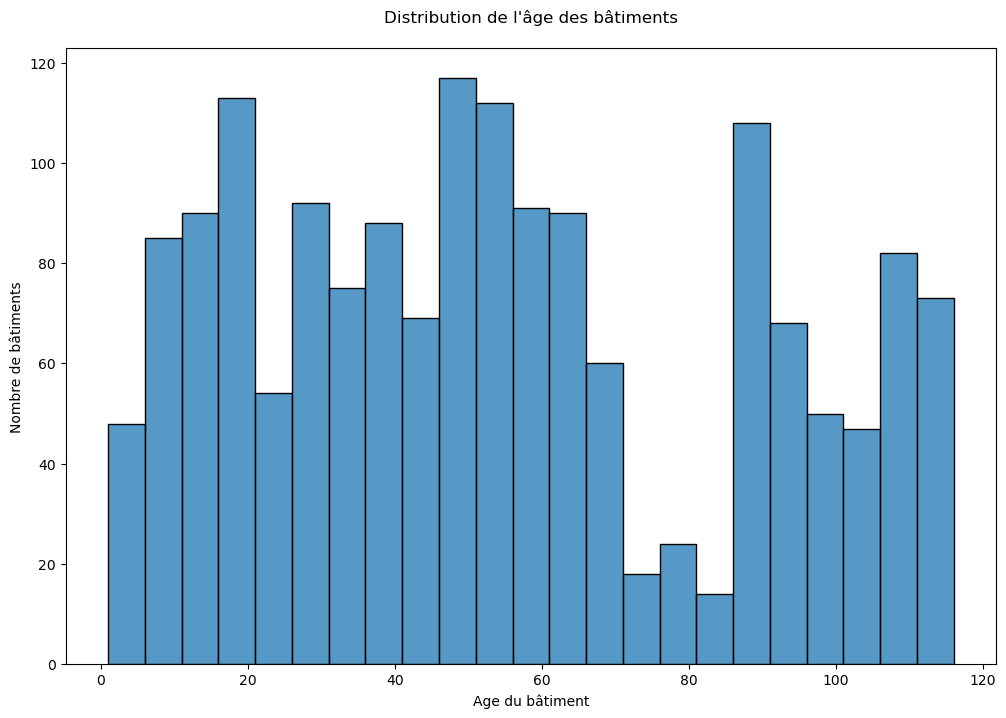

In [16]:
data['BuildingAge'] = data['DataYear'] - data['YearBuilt']
data.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='BuildingAge', bins=int((data.BuildingAge.max() - data.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n")
plt.show()

In [41]:
data['BuildingAge'].describe()

count    1665.000000
mean       54.066066
std        32.729577
min         1.000000
25%        27.000000
50%        51.000000
75%        86.000000
max       116.000000
Name: BuildingAge, dtype: float64

La moyenne est de 54 ans, et le ou les batiments les plus vieux ont 116 ans. Le ou les plus récents ont 1 an (en 2016)

In [18]:
from scipy.stats import pearsonr

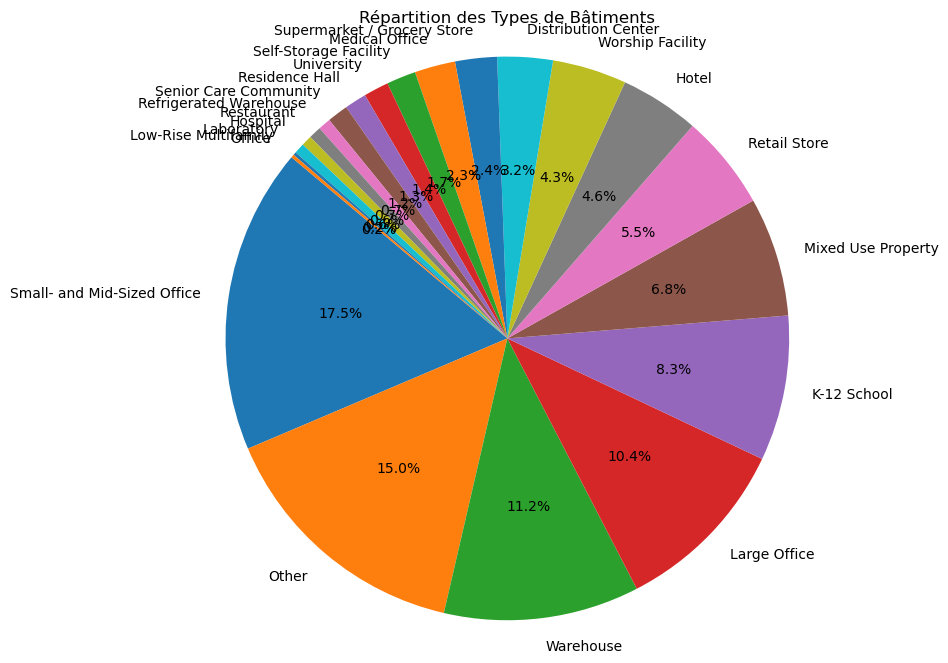

In [19]:
# Compter les occurrences de chaque type de bâtiment
building_type_counts = data['PrimaryPropertyType'].value_counts()

# Créer un pie chart
plt.figure(figsize=(8, 8))
plt.pie(building_type_counts, labels=building_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des Types de Bâtiments")
plt.axis('equal')  # Laisser le graphique circulaire
plt.show()

In [20]:
print(data['PrimaryPropertyType'].value_counts())

Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Name: PrimaryPropertyType, dtype: int64


il y a 'Low-Rise Multifamily' qui a catégorisé dans les non residentiels semble être une erreur, on va donc supprimer ces entrées.

In [21]:
data = data[data['PrimaryPropertyType'] != 'Low-Rise Multifamily']
data.shape

(1665, 46)

# Visualisation des 'other' pour PrimaryPropertyType

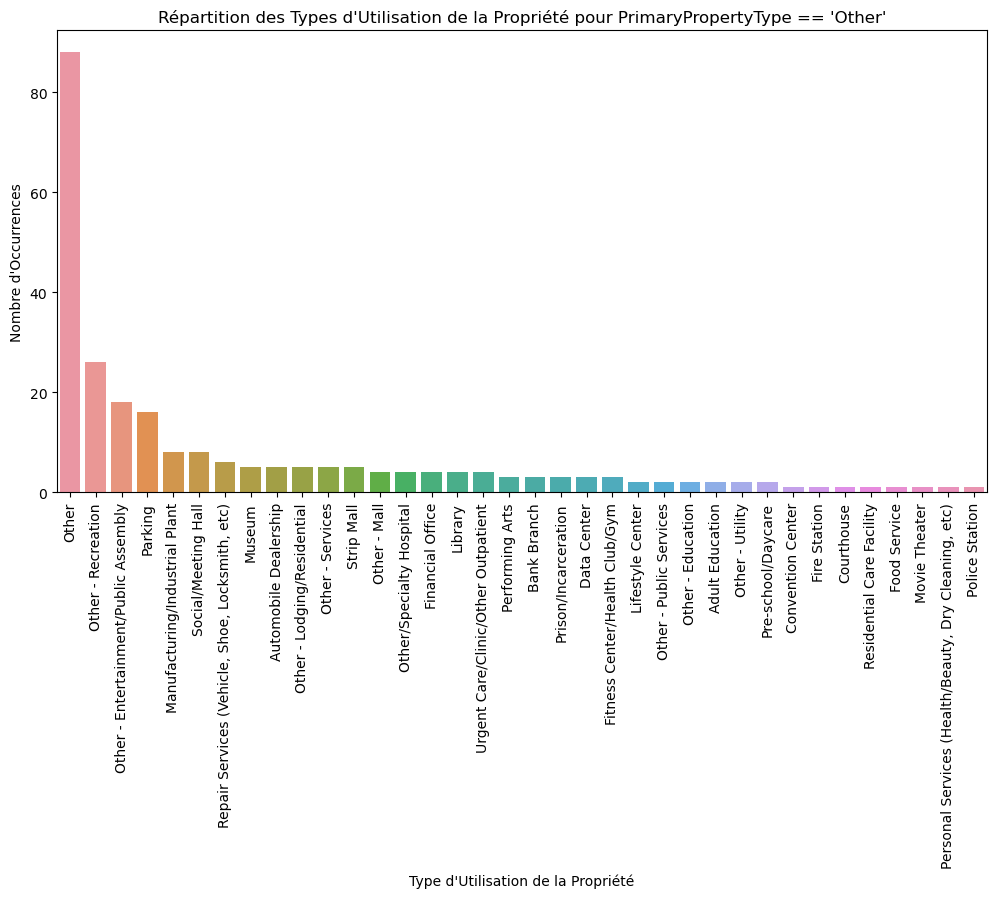

In [22]:
# Filtrer les données pour les entrées avec 'PrimaryPropertyType' == 'Other'
data_other = data[data['PrimaryPropertyType'] == 'Other']

# Compter les occurrences des types d'utilisation de la propriété pour les données filtrées
use_type_counts = data_other['LargestPropertyUseType'].value_counts()

# Créer un diagramme à barres pour la répartition des types d'utilisation de la propriété
plt.figure(figsize=(12, 6))
sns.barplot(x=use_type_counts.index, y=use_type_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Type d\'Utilisation de la Propriété')
plt.ylabel('Nombre d\'Occurrences')
plt.title('Répartition des Types d\'Utilisation de la Propriété pour PrimaryPropertyType == \'Other\'')
plt.show()

Beaucoup sont encore catégorisés en other, on va donc vérifier en SecondLargestPropertyUseType

## Visualisation de 'SecondLargestPropertyUseType'

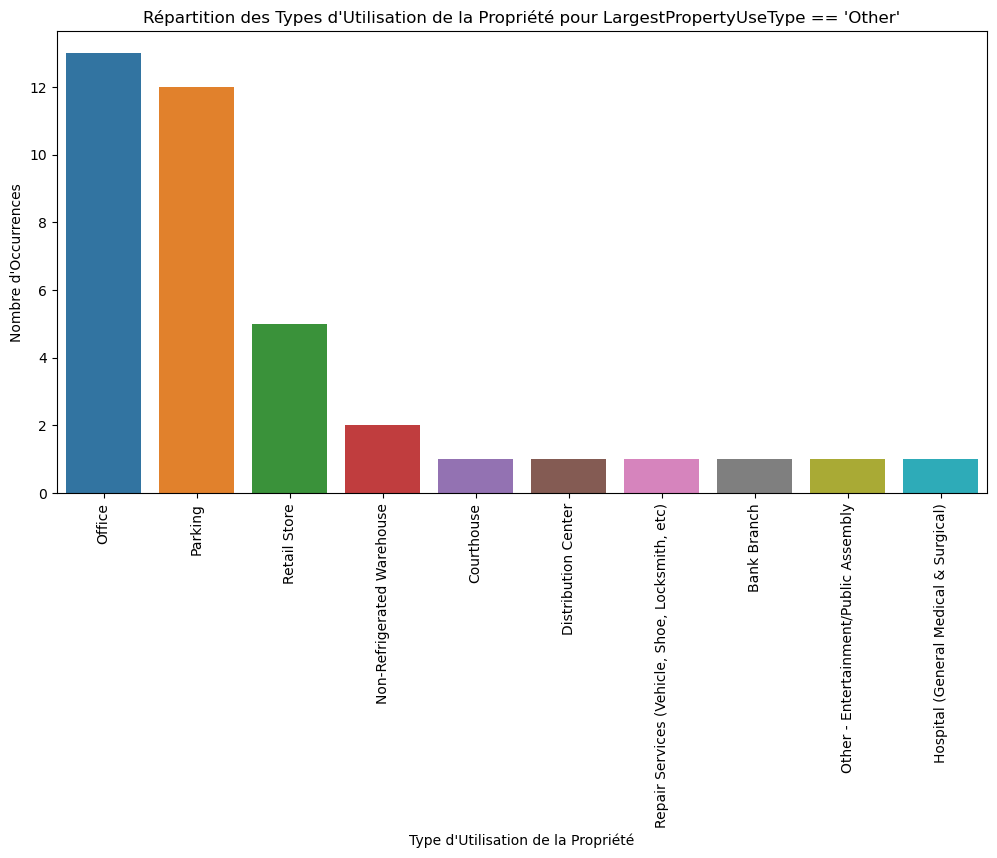

In [23]:
# Filtrer les données pour les entrées avec 'PrimaryPropertyType' == 'Other'
data_other = data[data['LargestPropertyUseType'] == 'Other']

# Compter les occurrences des types d'utilisation de la propriété pour les données filtrées
use_type_counts = data_other['SecondLargestPropertyUseType'].value_counts()

# Créer un diagramme à barres pour la répartition des types d'utilisation de la propriété
plt.figure(figsize=(12, 6))
sns.barplot(x=use_type_counts.index, y=use_type_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Type d\'Utilisation de la Propriété')
plt.ylabel('Nombre d\'Occurrences')
plt.title('Répartition des Types d\'Utilisation de la Propriété pour LargestPropertyUseType == \'Other\'')
plt.show()

On a des bureaux et parking, mais étant donnée qu'on est sur second largest property on ne peut pas utiliser le raccourci de transformer other la catégorie principale.

# Heatmap des corrélations linéaires

/var/folders/_m/r5l1c8n15kgb_gt5vpck03_w0000gn/T/ipykernel_87808/4168123877.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


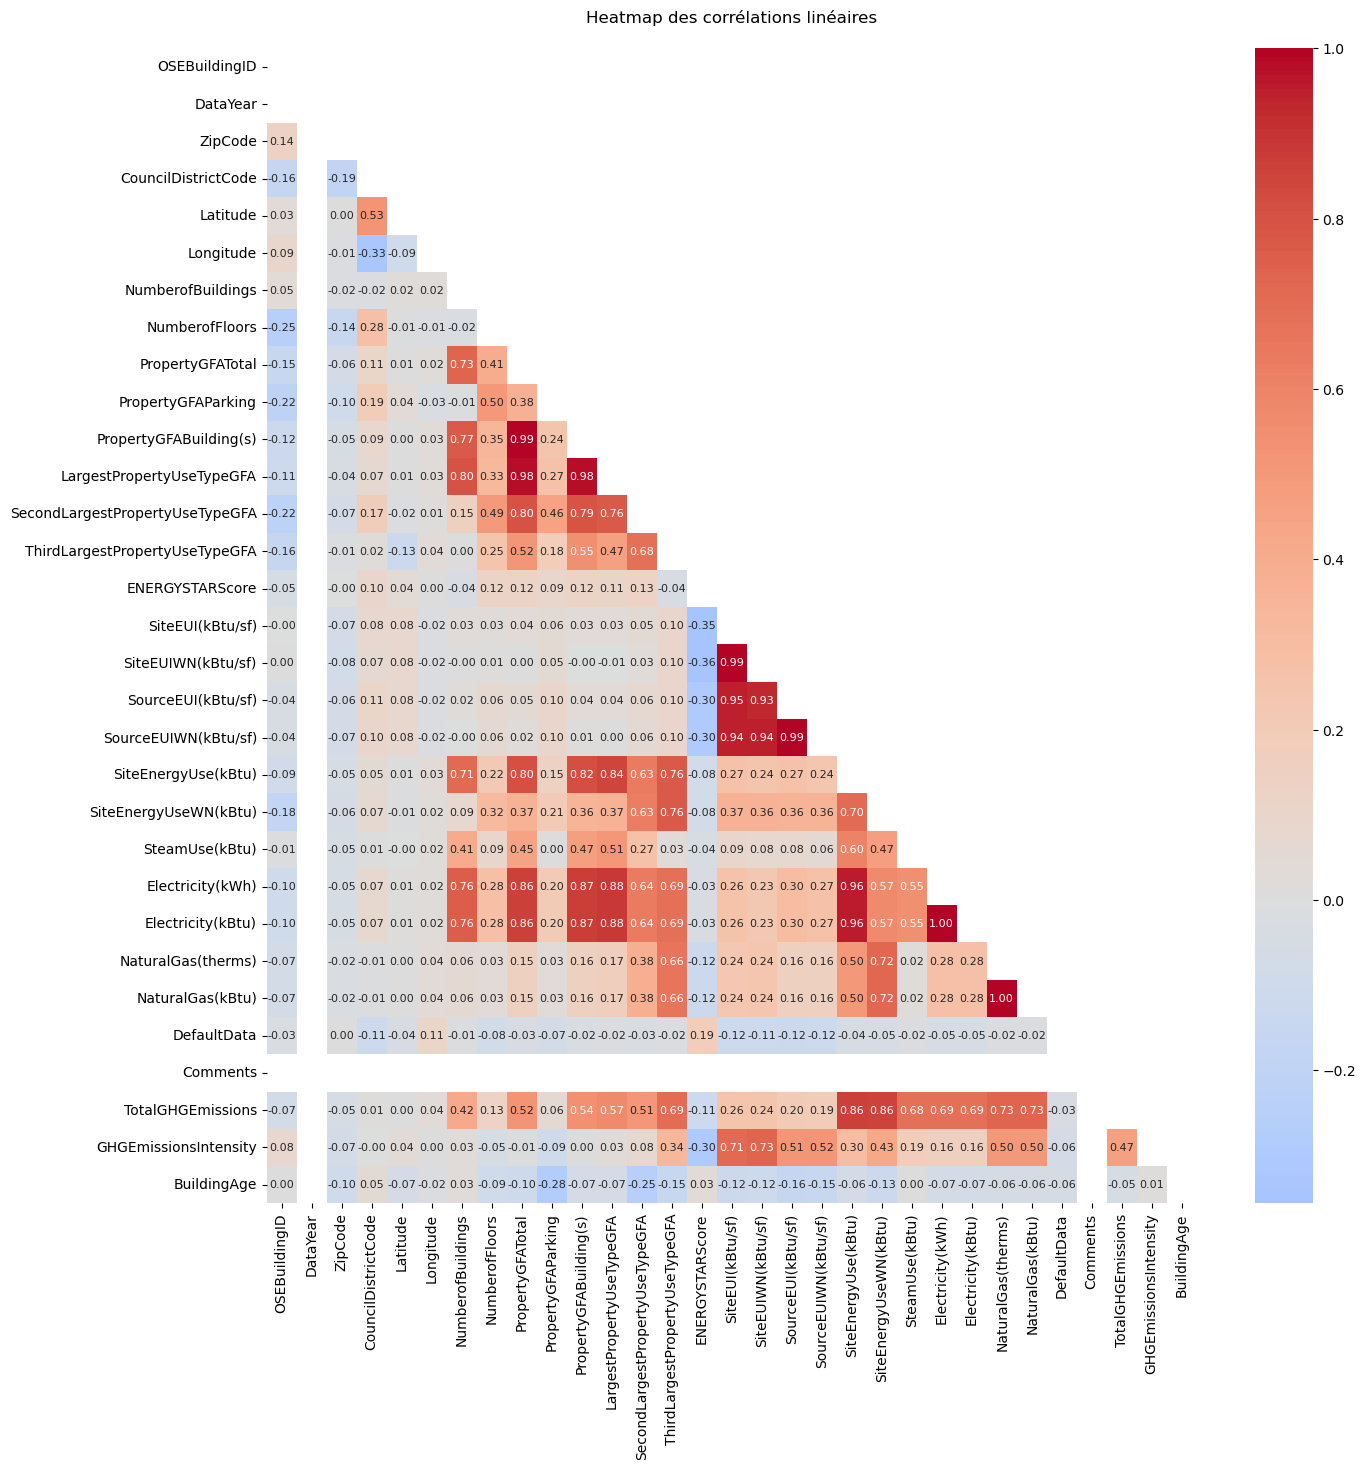

In [24]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

In [42]:
print (data.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',
       'TotalGHGE

Corrélation linéaires probables : 
* SiteEnergyUse(kBtu) x TotalGHGEmissions 
* Electricity (kWh et kBtu) x SiteEnergyUse(kBtu)
* Electricity (kWh et kBtu) x LargestPropertyUseTypeGFA
* Electricity (kWh et kBtu) x PropertyGFABuilding(s)
* PropertyGFATotal x LargestPropertyUseTypeGFA

PropertyGFABuilding(s) = The Gross Floor Area (GFA) is the total property square footage, as measured between the exterior walls of the building(s). 


In [44]:
data['LargestPropertyUseTypeGFA']

0        88434.0
1        83880.0
2       756493.0
3        61320.0
4       123445.0
          ...   
3371     12294.0
3372     16000.0
3373      7583.0
3374      6601.0
3375      8271.0
Name: LargestPropertyUseTypeGFA, Length: 1665, dtype: float64

## Distribution de la consommmation d'energie et émissions par type de propriété 

In [25]:
summary_stats = data.groupby('PrimaryPropertyType').agg({'SiteEnergyUse(kBtu)': ['mean', 'median', 'std'], 'TotalGHGEmissions': ['mean', 'median', 'std']})


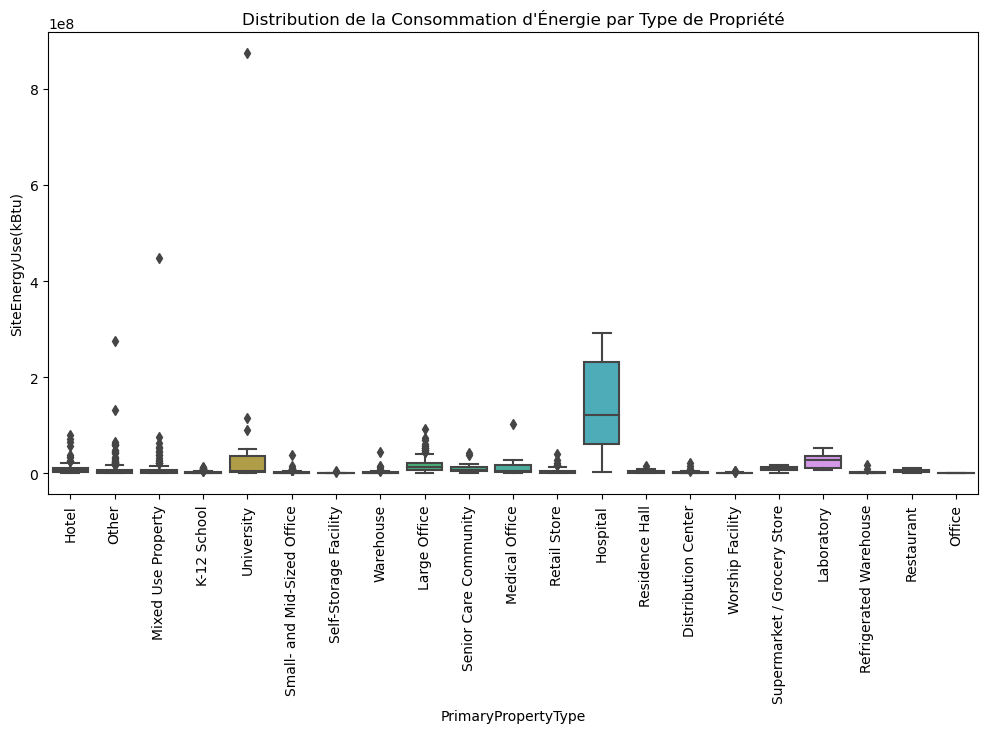

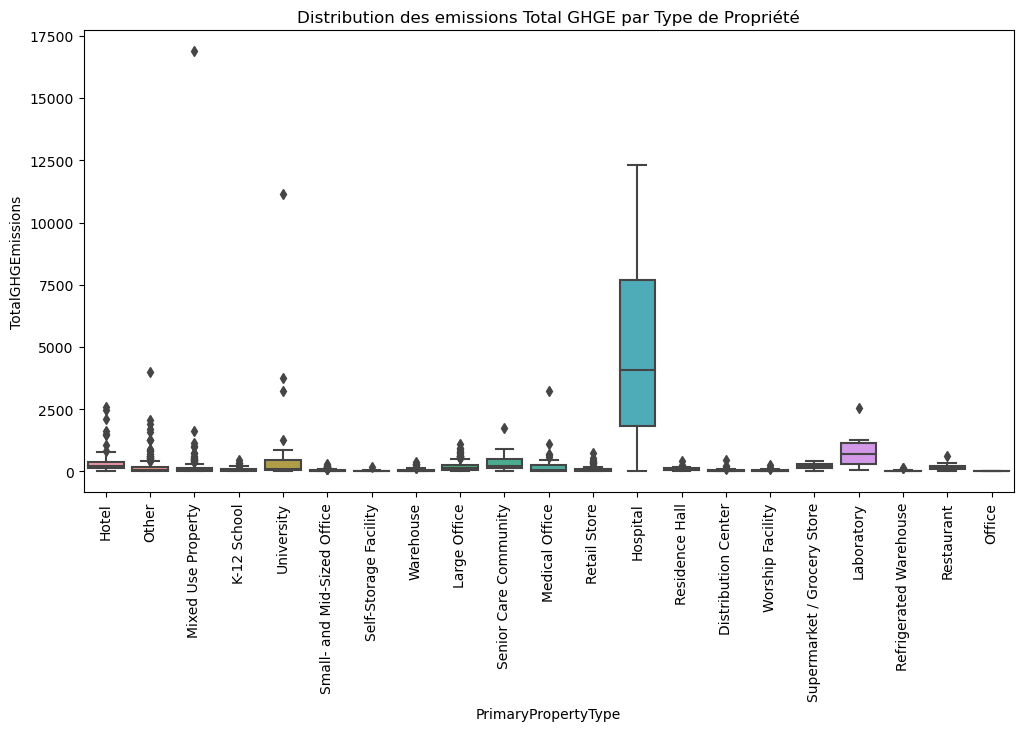

In [26]:
# Boxplot pour 'SiteEnergyUse(kBtu)' par type de propriété
plt.figure(figsize=(12, 6))
sns.boxplot(x='PrimaryPropertyType', y='SiteEnergyUse(kBtu)', data=data)
plt.xticks(rotation=90)
plt.title('Distribution de la Consommation d\'Énergie par Type de Propriété')
plt.show()

# Boxplot pour 'SiteEnergyUse(kBtu)' par type de propriété
plt.figure(figsize=(12, 6))
sns.boxplot(x='PrimaryPropertyType', y='TotalGHGEmissions', data=data)
plt.xticks(rotation=90)
plt.title('Distribution des emissions Total GHGE par Type de Propriété')
plt.show()

On peut remarquer plusieurs choses : 
* Hospital consomme plus que les autres 
* Les boxplots des emissions et consommations sont à peu près similaires 


# Analyse de la variable 'ENERGYSTARScore'

In [27]:
data[('ENERGYSTARScore')].describe()

count    1093.000000
mean       65.480329
std        28.487977
min         1.000000
25%        48.000000
50%        73.000000
75%        89.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

La distribution est normale, pas de valeurs aberrantes, on remarque que la tendance est vers une bonne note pour le plus de batiments 

In [28]:
data[('ENERGYSTARScore')].isna().count

<bound method Series.count of 0       False
1       False
2       False
3       False
4       False
        ...  
3371    False
3372     True
3373     True
3374     True
3375     True
Name: ENERGYSTARScore, Length: 1665, dtype: bool>

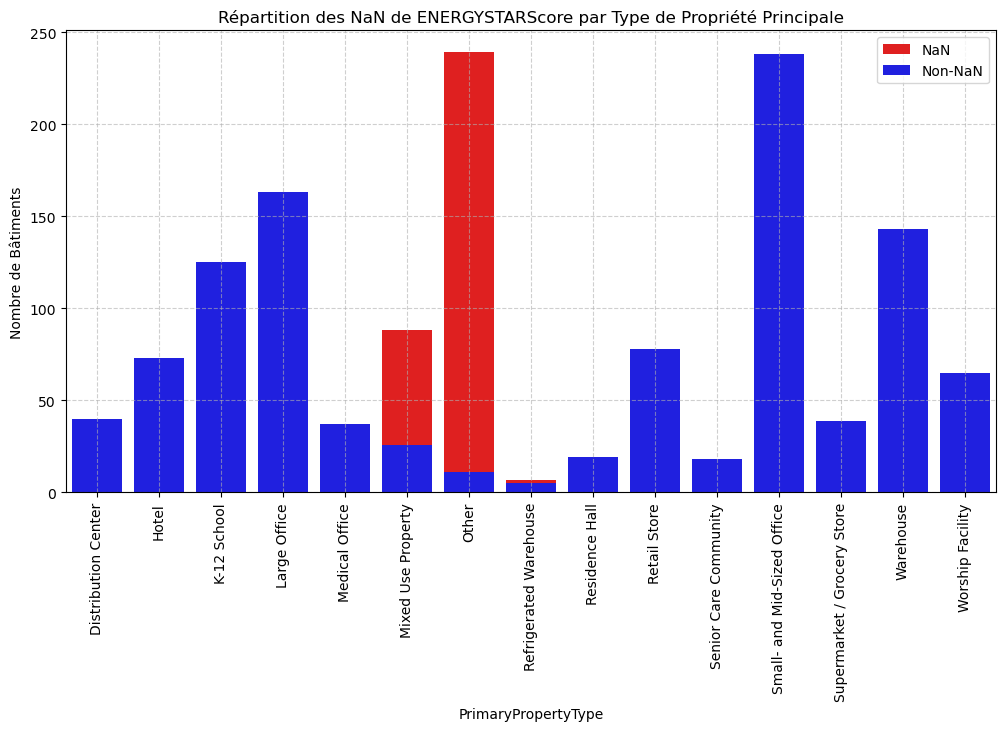

In [29]:
# Créer un dataframe pour regrouper les données NaN par type de propriété principale
nan_counts = data[data['ENERGYSTARScore'].isna()].groupby('PrimaryPropertyType').size().reset_index(name='NaN Count')

# Créer un dataframe pour regrouper les données non NaN par type de propriété principale
non_nan_counts = data[~data['ENERGYSTARScore'].isna()].groupby('PrimaryPropertyType').size().reset_index(name='Non-NaN Count')

# Fusionner les deux dataframes
nan_vs_non_nan = nan_counts.merge(non_nan_counts, on='PrimaryPropertyType', how='inner')

# Créer un graphique à barres empilées
plt.figure(figsize=(12, 6))
sns.barplot(x='PrimaryPropertyType', y='NaN Count', data=nan_vs_non_nan, color='red', label='NaN')
sns.barplot(x='PrimaryPropertyType', y='Non-NaN Count', data=nan_vs_non_nan, color='blue', label='Non-NaN')
plt.title('Répartition des NaN de ENERGYSTARScore par Type de Propriété Principale')
plt.xlabel('PrimaryPropertyType')
plt.ylabel('Nombre de Bâtiments')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C'est la catégorie "Other" qui possède le plus de valeurs manquantes et Mixed Use Property est aussi très peu renseignées.

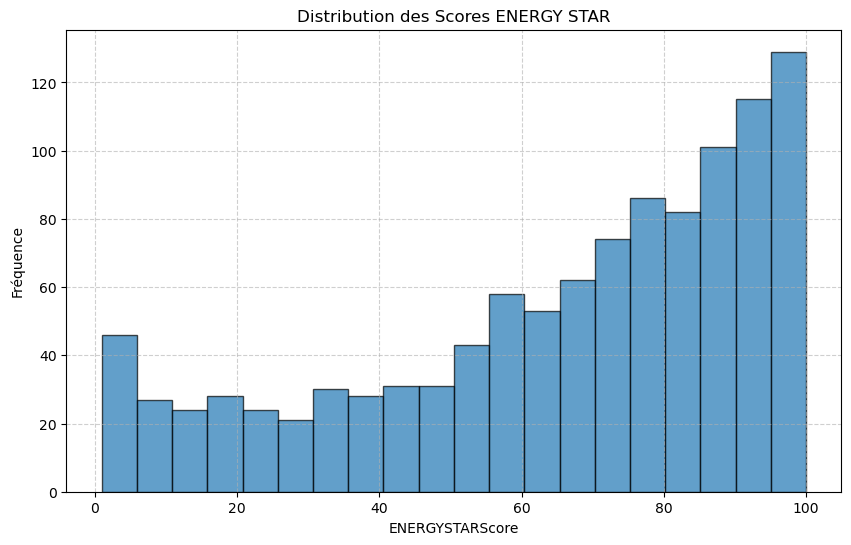

In [30]:
# Sélectionner la colonne 'ENERGYSTARScore'
energy_star_scores = data['ENERGYSTARScore']

# Créer un histogramme pour visualiser la distribution
plt.figure(figsize=(10, 6))
plt.hist(energy_star_scores, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution des Scores ENERGY STAR')
plt.xlabel('ENERGYSTARScore')
plt.ylabel('Fréquence')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

La distribution est normale, pas de valeurs aberrantes, on remarque que la tendance est vers une bonne note pour le plus de batiments 

## Graphique de Dispersion avec 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions'

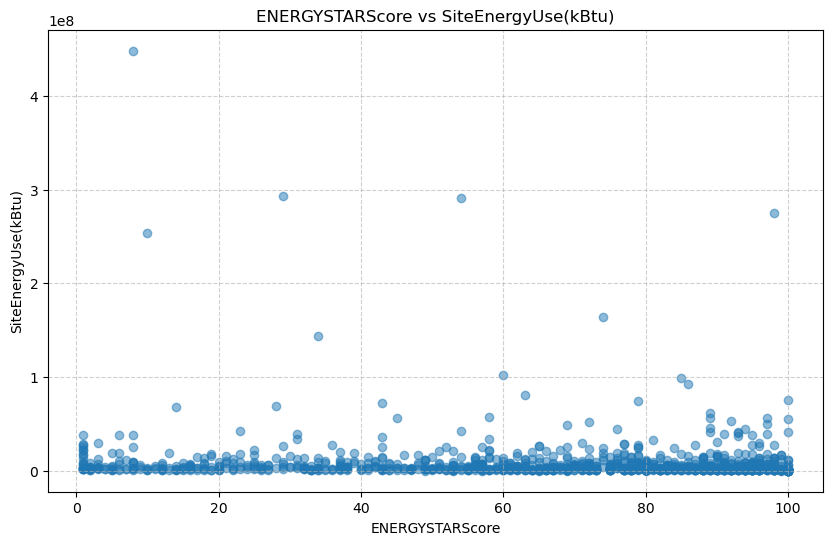

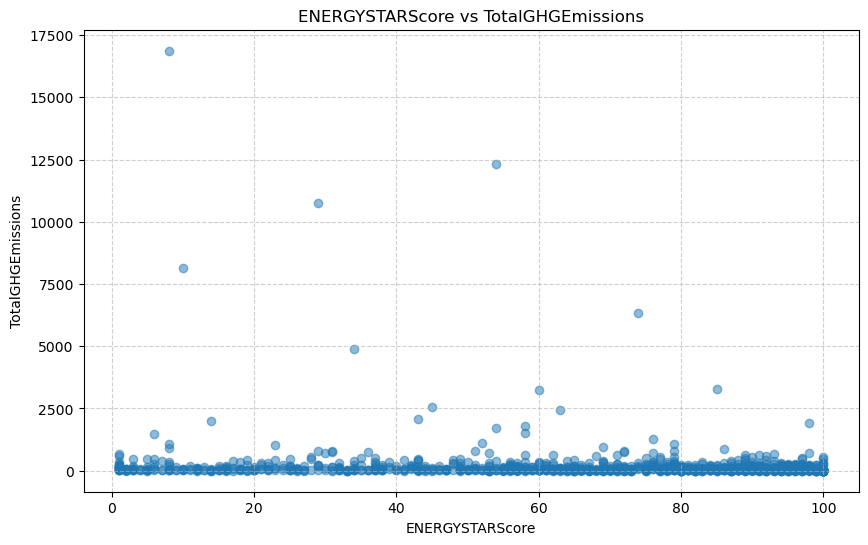

In [31]:
# Créer un graphique de dispersion pour 'ENERGYSTARScore' vs 'SiteEnergyUse(kBtu)'
plt.figure(figsize=(10, 6))
plt.scatter(data['ENERGYSTARScore'], data['SiteEnergyUse(kBtu)'], alpha=0.5)
plt.title('ENERGYSTARScore vs SiteEnergyUse(kBtu)')
plt.xlabel('ENERGYSTARScore')
plt.ylabel('SiteEnergyUse(kBtu)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Créer un graphique de dispersion pour 'ENERGYSTARScore' vs 'TotalGHGEmissions'
plt.figure(figsize=(10, 6))
plt.scatter(data['ENERGYSTARScore'], data['TotalGHGEmissions'], alpha=0.5)
plt.title('ENERGYSTARScore vs TotalGHGEmissions')
plt.xlabel('ENERGYSTARScore')
plt.ylabel('TotalGHGEmissions')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Ces observations sont cohérentes avec les attentes, car un score ENERGY STAR élevé est généralement associé à une meilleure efficacité énergétique et à une empreinte carbone réduite. 

## Le coefficient de corrélation de Pearson 

In [32]:
# Sélectionnez les variables numériques à analyser
numeric_variables = ['ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'PropertyGFATotal']

# Créez une sous-section du DataFrame avec uniquement ces variables
subset_data = data[numeric_variables]

# Calculer la matrice de corrélation de Pearson
correlation_matrix = subset_data.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)

                     ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  \
ENERGYSTARScore             1.000000            -0.080465          -0.108422   
SiteEnergyUse(kBtu)        -0.080465             1.000000           0.859929   
TotalGHGEmissions          -0.108422             0.859929           1.000000   
PropertyGFATotal            0.123129             0.804152           0.524527   

                     PropertyGFATotal  
ENERGYSTARScore              0.123129  
SiteEnergyUse(kBtu)          0.804152  
TotalGHGEmissions            0.524527  
PropertyGFATotal             1.000000  


* ENERGYSTARScore vs SiteEnergyUse(kBtu) :
Le coefficient de corrélation entre 'ENERGYSTARScore' et 'SiteEnergyUse(kBtu)' est d'environ -0,048. Cette valeur est proche de zéro, ce qui suggère une corrélation très faible entre ces deux variables. Il n'y a pas de corrélation linéaire évidente entre le score ENERGY STAR et la consommation totale d'énergie.

* ENERGYSTARScore vs TotalGHGEmissions :
Le coefficient de corrélation entre 'ENERGYSTARScore' et 'TotalGHGEmissions' est d'environ -0,086. De même, cette valeur est proche de zéro, indiquant une corrélation très faible entre le score ENERGY STAR et les émissions de CO2 totales. Il n'y a pas de corrélation linéaire évidente entre le score ENERGY STAR et les émissions de CO2.

* ENERGYSTARScore vs PropertyGFATotal :
Le coefficient de corrélation entre 'ENERGYSTARScore' et 'PropertyGFATotal' est d'environ 0,136. Bien que ce coefficient soit légèrement plus élevé que les deux précédents, il reste relativement faible. Cela suggère une corrélation faible entre le score ENERGY STAR et la superficie totale de la propriété.

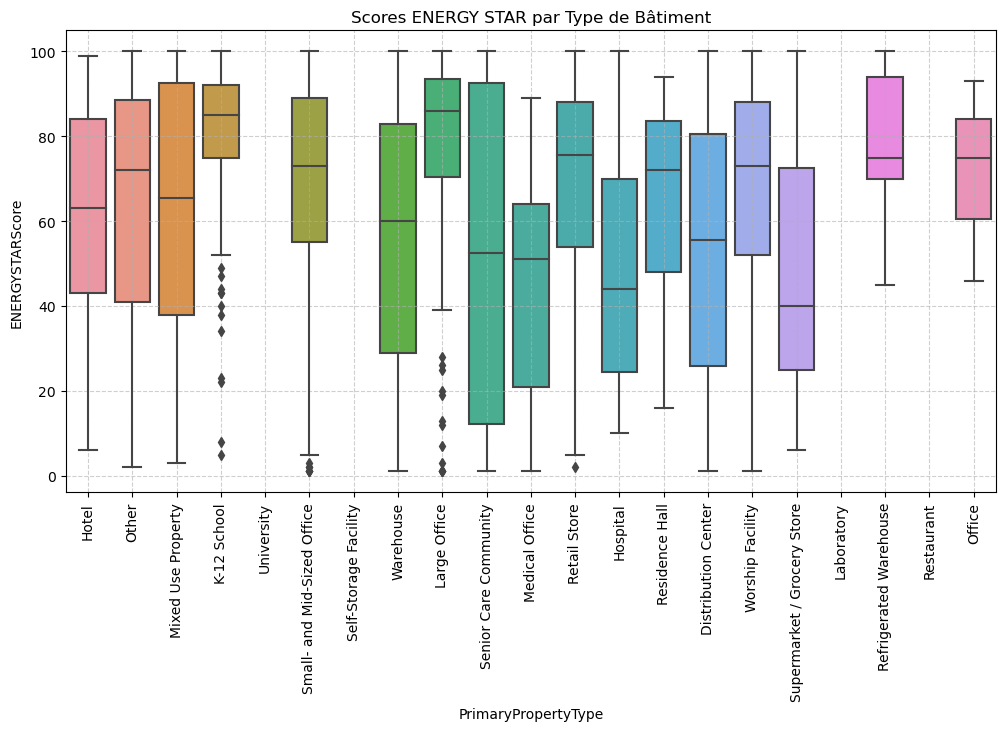

In [33]:
# Créer un graphique de boîtes à moustaches pour 'ENERGYSTARScore' par 'PrimaryPropertyType'
plt.figure(figsize=(12, 6))
sns.boxplot(x='PrimaryPropertyType', y='ENERGYSTARScore', data=data)
plt.title('Scores ENERGY STAR par Type de Bâtiment')
plt.xlabel('PrimaryPropertyType')
plt.ylabel('ENERGYSTARScore')
plt.xticks(rotation=90)  # Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [34]:
# Définir un seuil pour les scores ENERGY STAR (par exemple, 75 comme score élevé)
high_score_threshold = 75

# Créer des groupes de bâtiments en fonction des scores ENERGY STAR
high_score_buildings = data[data['ENERGYSTARScore'] >= high_score_threshold]
low_score_buildings = data[data['ENERGYSTARScore'] < high_score_threshold]

In [35]:
# Calculer la consommation d'énergie moyenne pour les deux groupes
average_energy_high_score = high_score_buildings['SiteEnergyUse(kBtu)'].mean()
average_energy_low_score = low_score_buildings['SiteEnergyUse(kBtu)'].mean()

# Afficher les résultats
print("Consommation d'énergie moyenne pour les bâtiments à score élevé:", average_energy_high_score)
print("Consommation d'énergie moyenne pour les bâtiments à score faible:", average_energy_low_score)

Consommation d'énergie moyenne pour les bâtiments à score élevé: 6859494.356377016
Consommation d'énergie moyenne pour les bâtiments à score faible: 9829295.413866965


# Scores Eenergy Star moyens par type de batiments

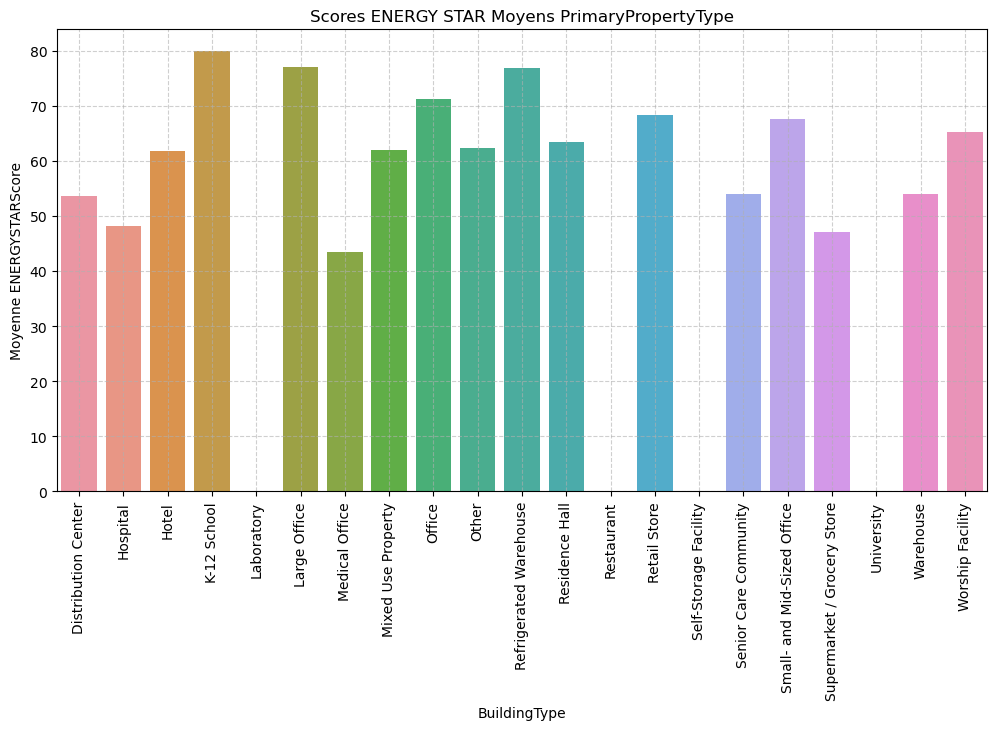

In [37]:
# Calculer les scores ENERGY STAR moyens par type primaire de bâtiment
average_scores_by_building_type = data.groupby('PrimaryPropertyType')['ENERGYSTARScore'].mean().reset_index()

# Créer un graphique en barres
plt.figure(figsize=(12, 6))
sns.barplot(x='PrimaryPropertyType', y='ENERGYSTARScore', data=average_scores_by_building_type)
plt.title('Scores ENERGY STAR Moyens PrimaryPropertyType')
plt.xlabel('BuildingType')
plt.ylabel('Moyenne ENERGYSTARScore')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# One Hot Encoding des variables non numériques 

In [38]:
# Utilisez la fonction get_dummies de Pandas pour effectuer le one-hot encoding
data_encoded = pd.get_dummies(data, columns=['PrimaryPropertyType'], prefix=['PropertyType'])

# La colonne 'PrimaryPropertyType' sera maintenant remplacée par de nouvelles colonnes binaires correspondant à chaque catégorie unique.

# Affichez les premières lignes du DataFrame résultant pour vérifier
print(data_encoded.head())

   OSEBuildingID  DataYear    BuildingType                 PropertyName  \
0              1      2016  NonResidential         Mayflower park hotel   
1              2      2016  NonResidential              Paramount Hotel   
2              3      2016  NonResidential      5673-The Westin Seattle   
3              5      2016  NonResidential                    HOTEL MAX   
4              8      2016  NonResidential  WARWICK SEATTLE HOTEL (ID8)   

           Address     City State  ZipCode TaxParcelIdentificationNumber  \
0    405 Olive way  Seattle    WA  98101.0                    0659000030   
1  724 Pine street  Seattle    WA  98101.0                    0659000220   
2  1900 5th Avenue  Seattle    WA  98101.0                    0659000475   
3   620 STEWART ST  Seattle    WA  98101.0                    0659000640   
4    401 LENORA ST  Seattle    WA  98121.0                    0659000970   

   CouncilDistrictCode  ... PropertyType_Residence Hall  \
0                    7  ...      

# Sauvegarde de la data nettoyée, explorée, modifiée

In [39]:
data.to_csv('data_saved.csv')